# Avengers: Thanos kill prediction

We all saw Avengers Infinity War.

Holding some of the best action and adventures by our favorite heroes. Touching us all by some of the best scene and death of our favorite superheroes just by a snap of Thano's fingers.



As Thano's described his story of making balance to universe by killing half of the planet's population, on a random basis and completely unbiased.



But was it completely random. Let's try to find out, and try to predict if a person will die in Marvel Cinematic universe by using Machine Learning.

We import the necessary libraries.
Pandas for data handling and manipulation.
Matplotlib and Seaborn For Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('avg.csv',index_col =False)

The data is been manually constructed, with some of the features that can be a possible reason for survival or death for a person.If any particular data is not available, it is assumed accordingly.Although in the field of data science this size is not considered usuable.But still, lest's move forward.

The data includes 

1. Name : The name of our character

2. Power Detail: The Power they hold

3. Power : Any supernatural power if they hold

4. Gender

5. Height: Thought might be a reason, maybe Thanos was interested in killing little ones.

6. Planet: To which planet they belong. For not increasing the clusters in prediction, I've included either from earth or from outside.

7. Contact with stones: If the character was in direct contact with stones, such as: guardian of the galaxy.

8. Type : The type of creäture they are, Human, God or Others( Monster and Groot)

9. Class: The five classes, Marvel alliance

        1. Blasters

        2. Bruiser

        3. Evasive

        4. Tactician

        5. Scrapper

        6. The others

10. The range of fight, whether they were in close fight or nearby fight with Thanos.

11. Killed: Finally the Kill, Our dependent variable.

In [3]:
data

,Name,Powers detail,Powers,Gender,Height,Planet,Contact with stones,Type,Class,Range,Killed
0,Iron Man,Technology,No,Male,6.10,Earth,No,Human,Blaster,Close,No
1,Hulk,Power,Yes,Male,7.00,Earth,No,Human,Bruiser,Close,No
2,Black Widow,Soldier,No,Female,5.70,Earth,No,Human,Evasive,Close,Yes
3,Loki,God of mischief,Yes,Male,6.40,Other,Yes,God,Tactician,Close,Yes
4,Steve Rogers,Soldier,No,Male,6.20,Earth,No,Human,Scrapper,Close,No
5,Thor,God of Thunder,Yes,Male,6.30,Earth,No,God,Bruiser,Close,No
6,Hawkeye,Arrow,No,Male,6.30,Other,No,Human,Blaster,Far,No
7,Star-Lord,Stupid,No,Male,6.20,Other,Yes,Human,Blaster,Close,Yes
8,Scarlet Witch,Chaos Magic,Yes,Female,5.70,Earth,No,Human,Tactician,Close,No
9,Bucky Barnes,Soldier,No,Male,5.70,Earth,No,Human,Evasive,Close,Yes


We look at some of the graphs to get some insights out of it.

The below histogram shows us the Number of People killed and Survived in respect to the class.
The character belonging to Other, shows the highest rate in both death and survival. But we can see Bruiser's died the least followed by Blasters.

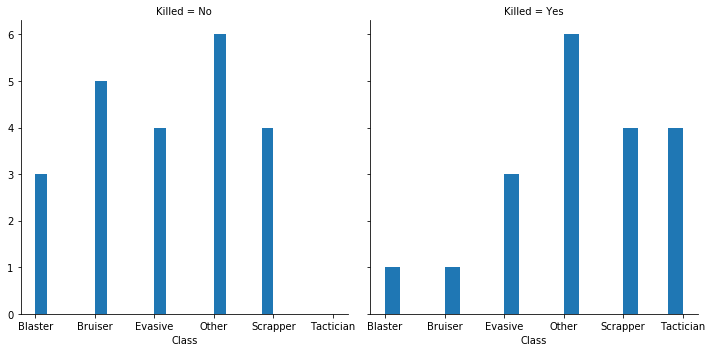

In [4]:
g = sns.FacetGrid(data, col='Killed',size=5)
g.map(plt.hist, 'Class', bins=20)
g.savefig('image.png')

Most of the fighters we had we're mainly belonging to Scrappers or Other's class

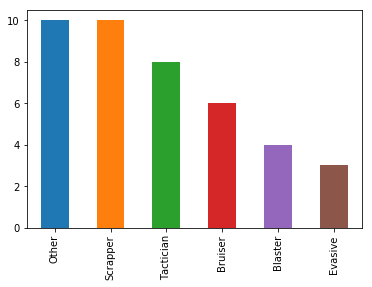

In [5]:
data['Class'].value_counts().plot.bar()

Below histogram shows, More People died from Earth as comapred to outsiders.

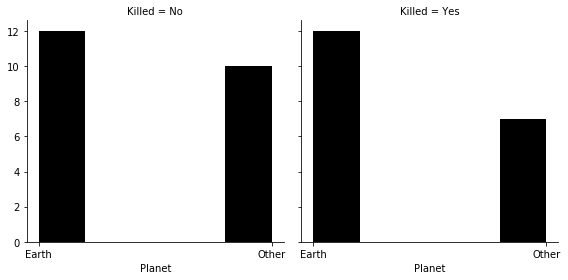

In [6]:
g = sns.FacetGrid(data, col='Killed',size =4)
g.map(plt.hist, 'Planet', bins=5,color ='black')

Since, we cannot feed String values to our ANN, we convert it into categorical values.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
data['Powers ']=encoder.fit_transform(data['Powers '])
data['Gender']=encoder.fit_transform(data['Gender'])
data['Planet']=encoder.fit_transform(data['Planet'])
data['Contact with stones']=encoder.fit_transform(data['Contact with stones'])
data['Type']=encoder.fit_transform(data['Type'])
data['Killed']=encoder.fit_transform(data['Killed'])
data['Range']=encoder.fit_transform(data['Range'])
data['Class']=encoder.fit_transform(data['Class'])

And the data looks like this after Encoding, Boolean values are in binary values, the class are coverted into category.

In [9]:
data.head()

,Name,Powers detail,Powers,Gender,Height,Planet,Contact with stones,Type,Class,Range,Killed
0,Iron Man,Technology,0,1,6.1,0,0,1,0,0,0
1,Hulk,Power,1,1,7.0,0,0,1,1,0,0
2,Black Widow,Soldier,0,0,5.7,0,0,1,2,0,1
3,Loki,God of mischief,1,1,6.4,1,1,0,5,0,1
4,Steve Rogers,Soldier,0,1,6.2,0,0,1,4,0,0


The heatmap shows the final realtion between the features, espically with Killed.


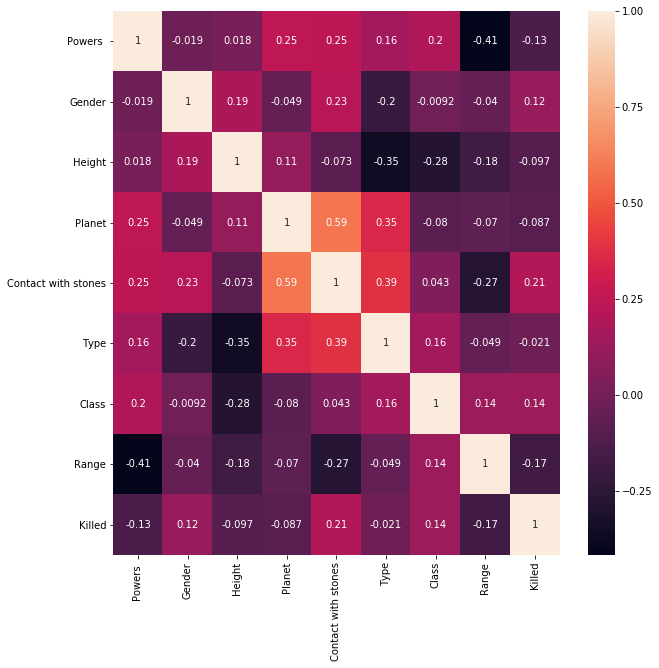

In [10]:
fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(
    data.corr(),
    annot=True,ax =ax
)
fig.savefig('5.png')

Now, we seprate out independent variables, i.e X containing 7 features

In [11]:
X = data.iloc[:,2:9]
y = data['Killed']
X.head()

,Powers,Gender,Height,Planet,Contact with stones,Type,Class
0,0,1,6.1,0,0,1,0
1,1,1,7.0,0,0,1,1
2,0,0,5.7,0,0,1,2
3,1,1,6.4,1,1,0,5
4,0,1,6.2,0,0,1,4


Now, after encoding if we stack up the values, we can see the most powerful characters in our data.

For example, index 11 shows one of the highest value, which belongs to Vision. Powerful Avenger and a stone holder.

     Similarly for Ebony Maw at 36, single-handedly captured Dr. Strange

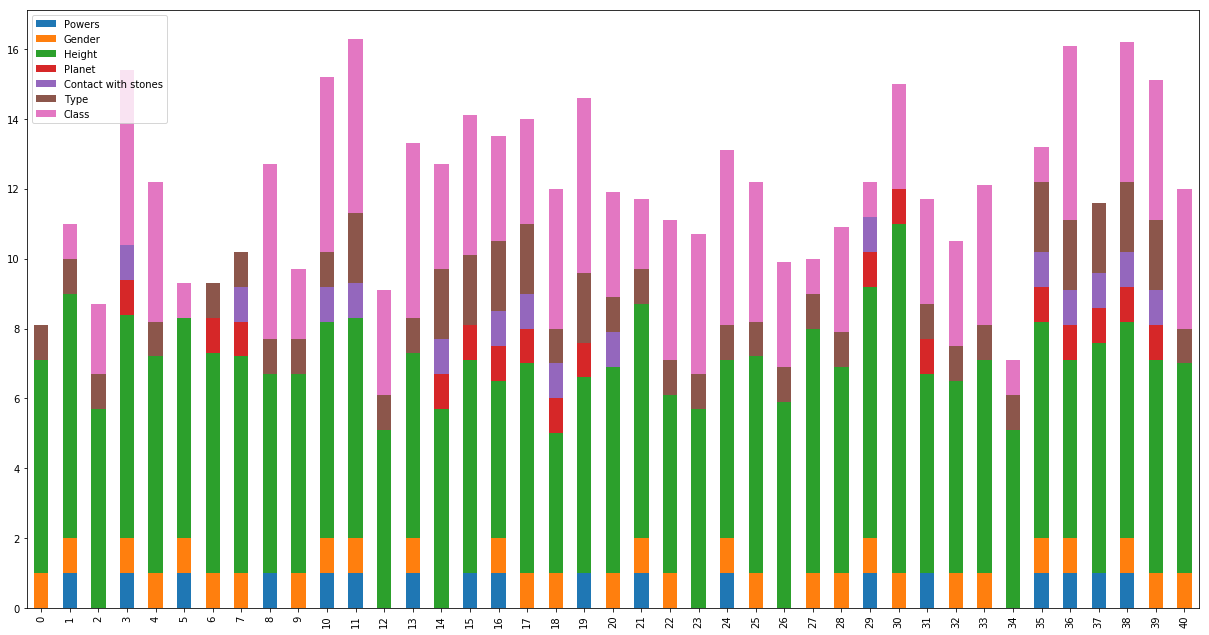

In [12]:
X.plot.bar(stacked=True,figsize=(21,11))

We split the data into train and test, in spite of being to small.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

And feed it a an Artifical Neural Network,containing one hidden layer.
7 input dimensions and one output: Died or Survived

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 7))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10,epochs = 100)

# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

Using TensorFlow backend.
/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6933 - acc: 0.2500
Epoch 2/100
32/32 [==============================] - 0s 244us/step - loss: 0.6931 - acc: 0.5625
Epoch 3/100
32/32 [==============================] - 0s 209us/step - loss: 0.6931 - acc: 0.5625
Epoch 4/100
32/32 [==============================] - 0s 263us/step - loss: 0.6931 - acc: 0.5625
Epoch 5/100
32/32 [==============================] - 0s 323us/step - loss: 0.6930 - acc: 0.5625
Epoch 6/100
32/32 [==============================] - 0s 212us/step - loss: 0.6929 - acc: 0.5625
Epoch 7/100
32/32 [==============================] - 0s 191us/step - loss: 0.6929 - acc: 0.5625
Epoch 8/100
32/32 [==============================] - 0s 222us/step - loss: 0.6927 - acc: 0.5625
Epoch 9/100
32/32 [==============================] - 0s 272us/step - loss: 0.6926 - acc: 0.5625
Epoch 10/100
32/32 [==============================] - 0s 324us/step - loss: 0.6926 - acc: 0.5625
Epoch 11/100
32/32 [=====================

32/32 [==============================] - 0s 248us/step - loss: 0.6718 - acc: 0.5625
Epoch 86/100
32/32 [==============================] - 0s 243us/step - loss: 0.6715 - acc: 0.5625
Epoch 87/100
32/32 [==============================] - 0s 220us/step - loss: 0.6713 - acc: 0.5625
Epoch 88/100
32/32 [==============================] - 0s 233us/step - loss: 0.6703 - acc: 0.5625
Epoch 89/100
32/32 [==============================] - 0s 157us/step - loss: 0.6697 - acc: 0.5625
Epoch 90/100
32/32 [==============================] - 0s 227us/step - loss: 0.6693 - acc: 0.5625
Epoch 91/100
32/32 [==============================] - 0s 291us/step - loss: 0.6688 - acc: 0.5937
Epoch 92/100
32/32 [==============================] - 0s 193us/step - loss: 0.6680 - acc: 0.5937
Epoch 93/100
32/32 [==============================] - 0s 248us/step - loss: 0.6671 - acc: 0.5938
Epoch 94/100
32/32 [==============================] - 0s 222us/step - loss: 0.6662 - acc: 0.5625
Epoch 95/100
32/32 [=======================

So, best we got is <b>56%</b> accuracy on this tiny data set. And not able to find any major relation between the survival and feature.

Looks like Thanos was a worthy villan, having a bigger vision then emotions and relations.

But what would have happened if this guy was in picture

![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZIa5-mWOnPOCaUr8XTCxHSXGNlpQxv3yAKRmdt83l23cLXicdXA)